# Symptom Timeline Graph

In [50]:
import pandas as pd
import numpy as np
from pyathena import connect
from pyathena.pandas.cursor import PandasCursor
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [51]:
from sensorfabric.athena import athena

In [52]:
%set_env AWS_PROFILE=opensci

env: AWS_PROFILE=opensci


In [53]:
db = athena(database='menolife', workgroup='amyris', offlineCache=True)

In [54]:
query = """
SELECT date_format(datetime, '%m/%d/%Y') date, COUNT(uid) count FROM symptoms 
  WHERE datetime > DATE('2020-09-01')
  GROUP BY date_format(datetime, '%m/%d/%Y')
"""

symptom_timeline = db.execQuery(query, cached=True)

In [55]:
symptom_timeline

,date,count
0,10/01/2020,4
1,10/23/2020,23
2,10/24/2020,17
3,10/05/2020,3
4,10/29/2020,251
...,...,...
906,02/23/2023,562
907,02/22/2023,443
908,03/03/2023,476
909,03/23/2023,326


In [56]:
symptom_timeline['date'] = symptom_timeline['date'].astype('datetime64[ns]')
symptom_timeline['count'] = symptom_timeline['count'].astype('int64')

In [57]:
# Set the font for all the graphs to Arial.
plt.rcParams['font.family'] = ['sans serif']
plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12

sns.set_palette('coolwarm')

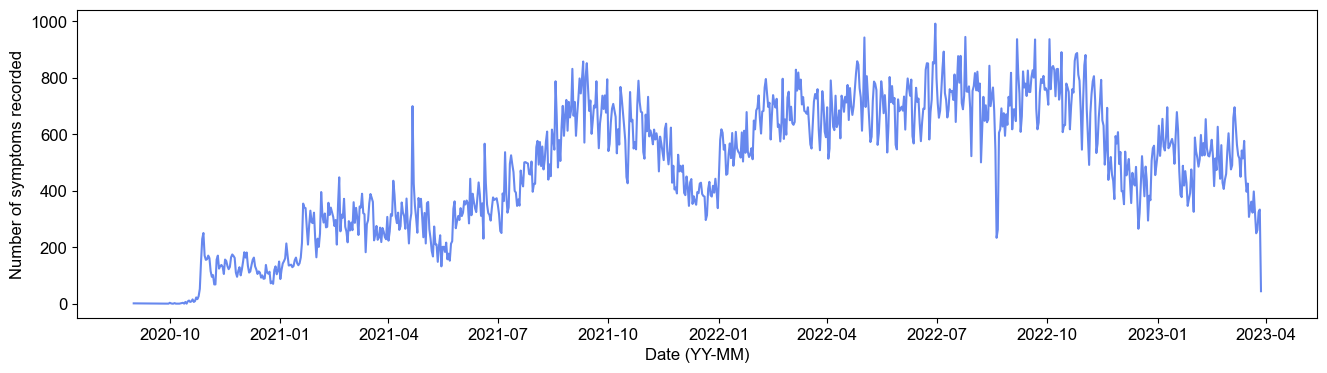

In [58]:
plt.figure(figsize=(16,4))
fig = sns.lineplot(symptom_timeline, x='date', y='count')
plt.xlabel('Date (YY-MM)')
plt.ylabel('Number of symptoms recorded')

plt.savefig('paper_figures/symptom_counts.png')